In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.model_selection  import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_excel ("Data_Train.xlsx",parse_dates=[0])


### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

## 
Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [9]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## checking shape  of data 

In [12]:
data.shape

(10683, 11)

#### we have data  with 10683 rows and 11 columns 

##  first 5  rows 

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## last 5 rows 

In [14]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### sample data  

In [15]:
data.sample(17)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9261,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
2621,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,07:40 13 Mar,12h 45m,1 stop,No info,13817
440,Air India,21/04/2019,Banglore,Delhi,BLR → DEL,21:05,23:55,2h 50m,non-stop,No info,5228
5290,IndiGo,1/05/2019,Kolkata,Banglore,CCU → BLR,22:15,00:50 02 May,2h 35m,non-stop,No info,4804
8690,IndiGo,9/03/2019,Delhi,Cochin,DEL → HYD → COK,11:55,22:20,10h 25m,1 stop,No info,6674
9339,Air India,27/04/2019,Banglore,Delhi,BLR → DEL,10:00,12:45,2h 45m,non-stop,No info,5228
691,Multiple carriers,27/06/2019,Delhi,Cochin,DEL → HYD → COK,14:55,22:30,7h 35m,1 stop,In-flight meal not included,6093
4126,Jet Airways,06/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,16:10,10h 25m,1 stop,No info,16736
9326,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → IDR → BOM → COK,15:05,01:30 16 May,10h 25m,2 stops,No info,16840
5189,Multiple carriers,3/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,01:35 04 Mar,12h 45m,1 stop,No info,18192


 
   ### CHECKING DATA TYPES

In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#   CONVERTING DATE AND TIME

In [17]:
import time
import datetime

data['Date_of_Journey']  = pd.to_datetime(data['Date_of_Journey'] , dayfirst=True)

In [18]:
df['Month']=  data['Date_of_Journey'].apply(lambda x:x.month)
df['Day']=  data['Date_of_Journey'].apply(lambda x:x.day)

In [19]:
data["ARR_Hour"] = pd.to_datetime(data["Arrival_Time"] )
data["ARR_min"] = pd.to_datetime(data["Arrival_Time"])

In [20]:
data["ARR_Hour"] = pd.to_datetime(data["Arrival_Time"] ).dt.hour
data["ARR_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [21]:
data["Dep_Hour"] = pd.to_datetime(data["Dep_Time"] ).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [22]:


data['Duration'] = data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [23]:
data.drop(["Date_of_Journey" , "Dep_Time", "Arrival_Time"  ,"Additional_Info"]  , axis  =1  , inplace =  True)

In [24]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Day,ARR_Hour,ARR_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,3897,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,4107,4,9,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,4145,4,27,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,7229,4,27,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,12648,3,1,14,10,11,30


# DESCRIBING DATA

In [25]:
data.describe()

,Duration,Price,Month,Day,ARR_Hour,ARR_min,Dep_Hour,Dep_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,9087.064121,4.708602,13.508378,13.348778,24.690630,12.490686,24.411214
std,507.862001,4611.359167,1.164357,8.479277,6.859125,16.506036,5.748650,18.767980
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,3.000000,6.000000,8.000000,10.000000,8.000000,5.000000
50%,520.000000,8372.000000,5.000000,12.000000,14.000000,25.000000,11.000000,25.000000
75%,930.000000,12373.000000,6.000000,21.000000,19.000000,35.000000,18.000000,40.000000
max,2860.000000,79512.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000


## checking for null data 

In [26]:
data.isnull().sum()

Airline        0
Source         0
Destination    0
Route          1
Duration       0
Total_Stops    1
Price          0
Month          0
Day            0
ARR_Hour       0
ARR_min        0
Dep_Hour       0
Dep_min        0
dtype: int64

<AxesSubplot:>

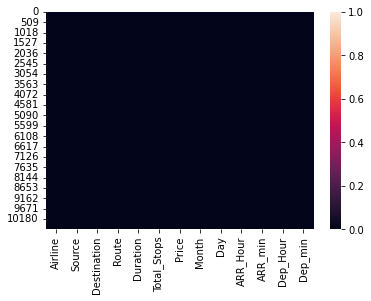

In [27]:
sns.heatmap (data.isnull())

In [28]:
print(data[data['Route'].isnull()])


        Airline Source Destination Route  Duration Total_Stops  Price  Month  \
9039  Air India  Delhi      Cochin   NaN      1420         NaN   7480      5   

      Day  ARR_Hour  ARR_min  Dep_Hour  Dep_min  
9039    6         9       25         9       45  


### we can see the null values are on  9039  row 

### there is only 1 null data in  
### Route and Total_Stops 

#  DROPPIN NULL DATA 

In [29]:
data.dropna(inplace = True)


In [30]:
data.isnull().sum()


Airline        0
Source         0
Destination    0
Route          0
Duration       0
Total_Stops    0
Price          0
Month          0
Day            0
ARR_Hour       0
ARR_min        0
Dep_Hour       0
Dep_min        0
dtype: int64

In [31]:
data.shape

(10682, 13)



# checking for unique values

In [32]:
data.nunique()

Airline          12
Source            5
Destination       6
Route           128
Duration        368
Total_Stops       5
Price          1870
Month             4
Day              10
ARR_Hour         24
ARR_min          12
Dep_Hour         24
Dep_min          12
dtype: int64

In [33]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price', 'Month', 'Day', 'ARR_Hour', 'ARR_min', 'Dep_Hour', 'Dep_min'],
      dtype='object')

# checking unique values in each column 

In [34]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [35]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [36]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
data["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [38]:
data["Dep_Hour"].value_counts()

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_Hour, dtype: int64

In [39]:
data["Dep_min"].value_counts()

0     2062
30    1215
55    1058
10     890
45     875
5      773
15     692
25     691
20     666
35     665
50     591
40     504
Name: Dep_min, dtype: int64

In [40]:
data["Duration"].value_counts()

170     550
90      386
165     337
175     337
155     329
       ... 
1890      1
1825      1
2525      1
250       1
2860      1
Name: Duration, Length: 368, dtype: int64

In [41]:
data["ARR_Hour"].value_counts()

19    1626
12     897
4      838
21     703
22     647
1      529
18     514
9      489
23     485
10     476
8      471
7      417
20     377
16     370
0      322
13     308
11     298
14     295
17     191
15     182
2       79
5       69
6       52
3       47
Name: ARR_Hour, dtype: int64

In [42]:
data["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [43]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Day,ARR_Hour,ARR_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,3897,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,4107,4,9,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,4145,4,27,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,7229,4,27,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,12648,3,1,14,10,11,30


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      10682 non-null  object
 1   Source       10682 non-null  object
 2   Destination  10682 non-null  object
 3   Route        10682 non-null  object
 4   Duration     10682 non-null  int64 
 5   Total_Stops  10682 non-null  object
 6   Price        10682 non-null  int64 
 7   Month        10682 non-null  int64 
 8   Day          10682 non-null  int64 
 9   ARR_Hour     10682 non-null  int64 
 10  ARR_min      10682 non-null  int64 
 11  Dep_Hour     10682 non-null  int64 
 12  Dep_min      10682 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


#   univariate analysis

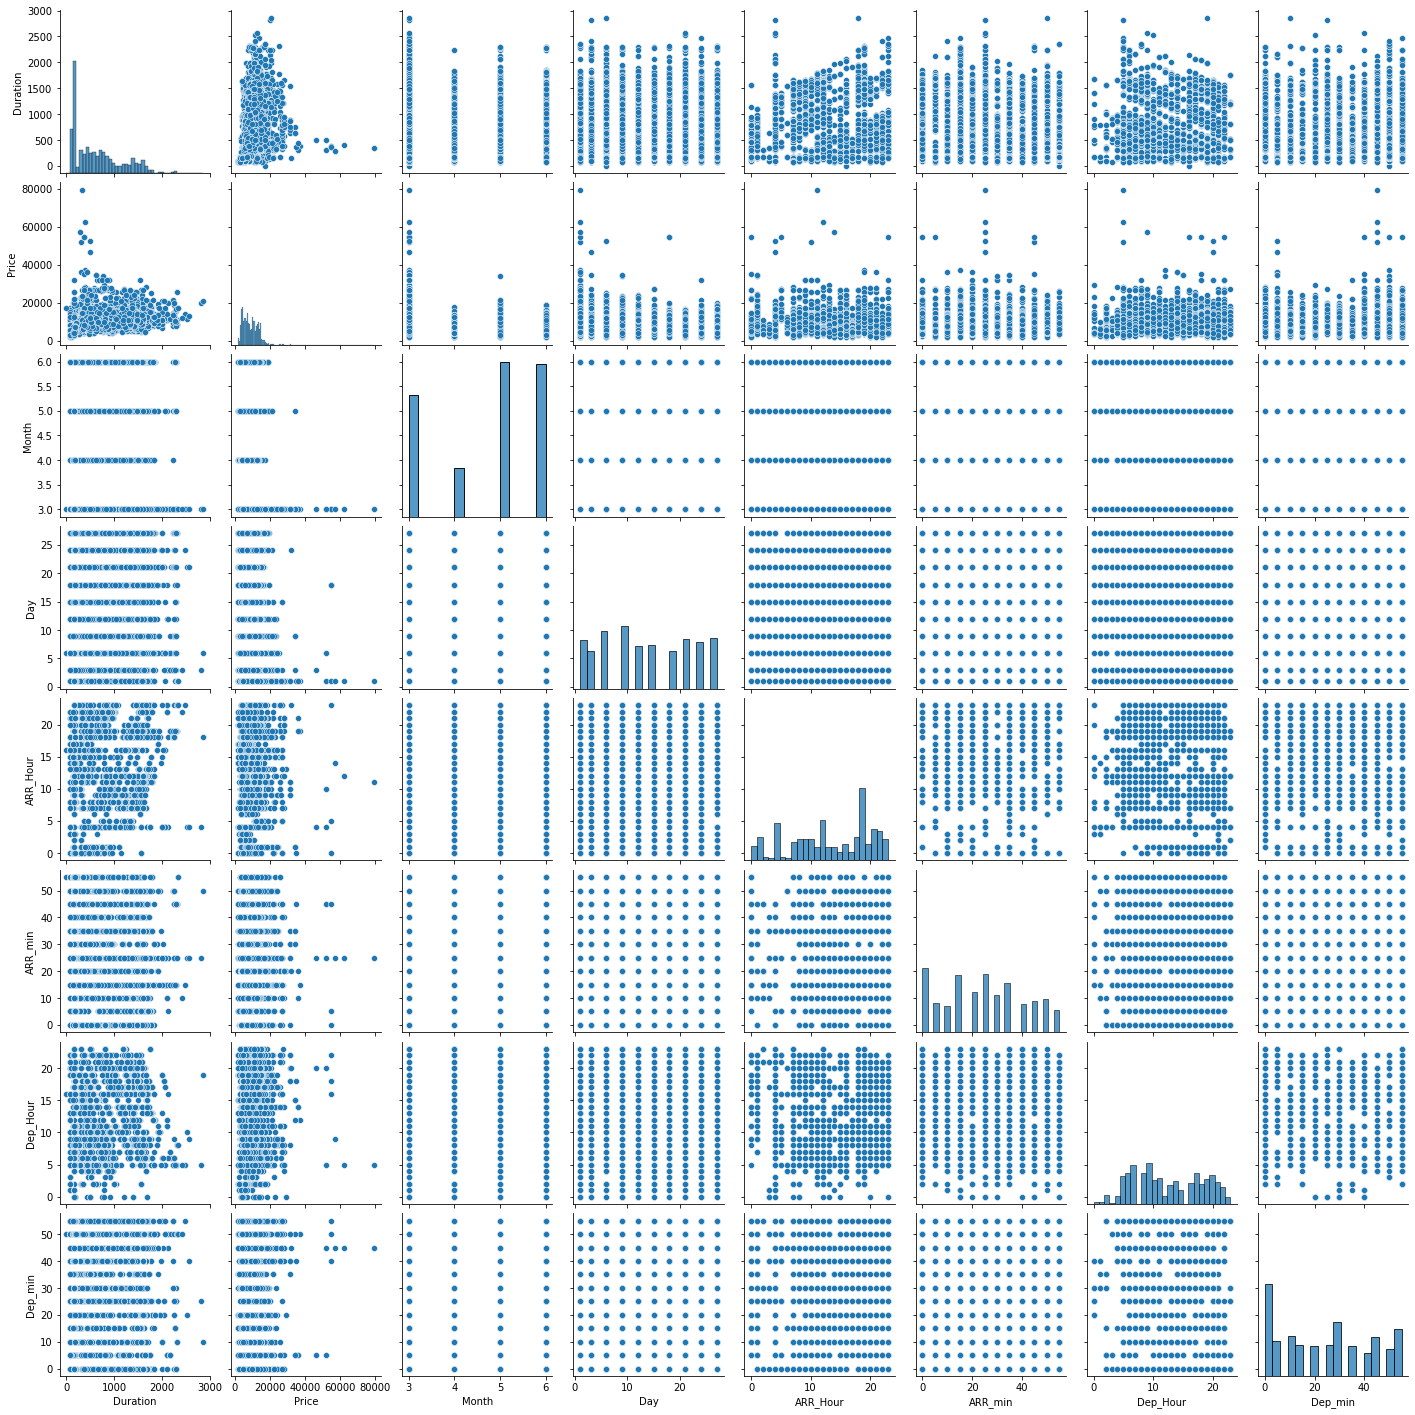

In [45]:
sns.pairplot(data)

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

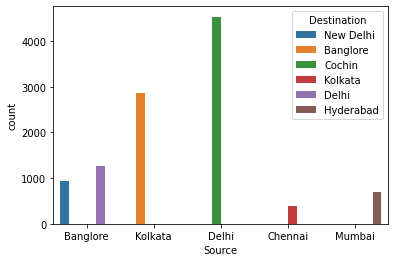

In [46]:
sns.countplot(data["Source"] , hue = "Destination" , data = data)
data["Source"].value_counts()

from the above grap we can see the leading source  is   Delhi  with frequency of 4536
most  travelers are going to  cochin   

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

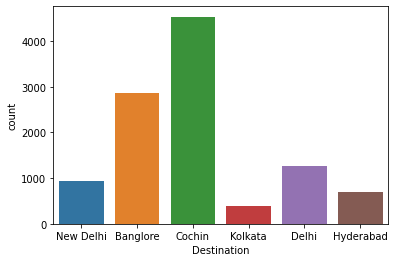

In [47]:
sns.countplot(data["Destination"]  , data = data)
data["Destination"].value_counts()

 top destination is cochin

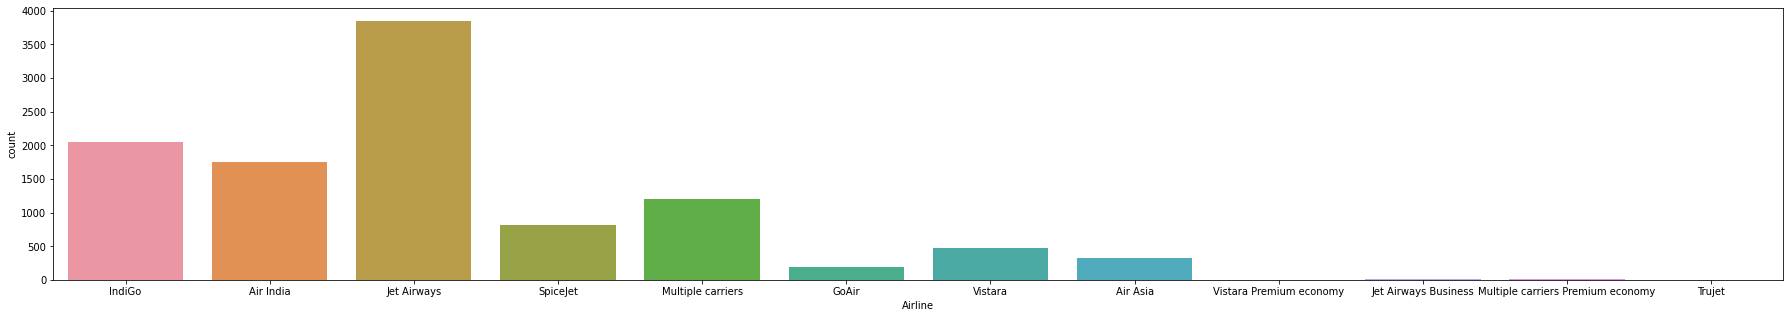

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [48]:
plt.figure(figsize = (31, 5))
sns.countplot(data["Airline"]  , data = data)
plt.show()

data["Airline"].value_counts()


from the above  graph we can see that the Jet Airways with  3849
and 
IndiGo  with  2053   flights 

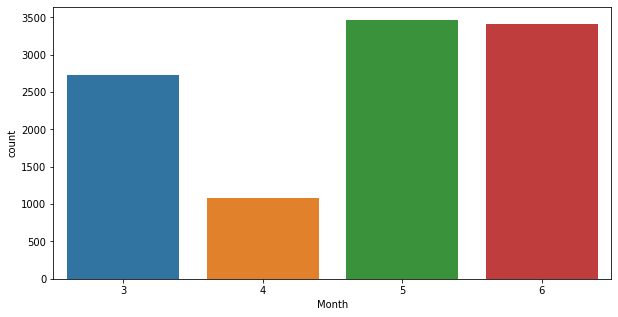

5    3465
6    3414
3    2724
4    1079
Name: Month, dtype: int64

In [49]:
plt.figure(figsize = (10, 5))
sns.countplot(   data ["Month"] , data = data)
plt.show()

data["Month"].value_counts()


we can see the  highest travel  has taken place  in the month of  may and june , least in april 

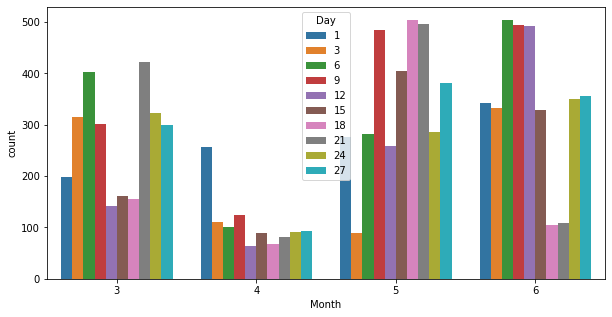

5    3465
6    3414
3    2724
4    1079
Name: Month, dtype: int64

In [50]:
plt.figure(figsize = (10, 5))
sns.countplot(   data ["Month"] , hue = "Day" , data = data)
plt.show()

data["Month"].value_counts()

we can see that the most travels are made on may and june 
top travel dates are may 18th , 15th , 9th  and june 6th , 9th , 12th 
also the data  shows the  highest number of travles are made on 9th and 6th 

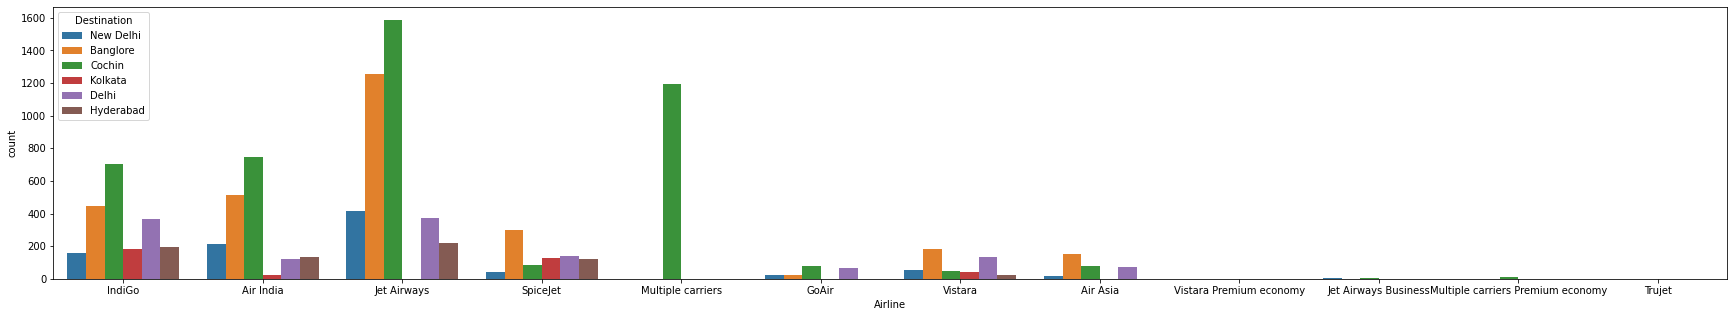

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [51]:
plt.figure(figsize = (30, 5))
sns.countplot(   data ["Airline"] , hue = "Destination" , data = data)
plt.show()

data["Destination"].value_counts()

from the above grah we can see that most fights  tarvels to cochin the highest 
least travels are made  to kolkata by most of the flights

<AxesSubplot:xlabel='Airline', ylabel='Count'>

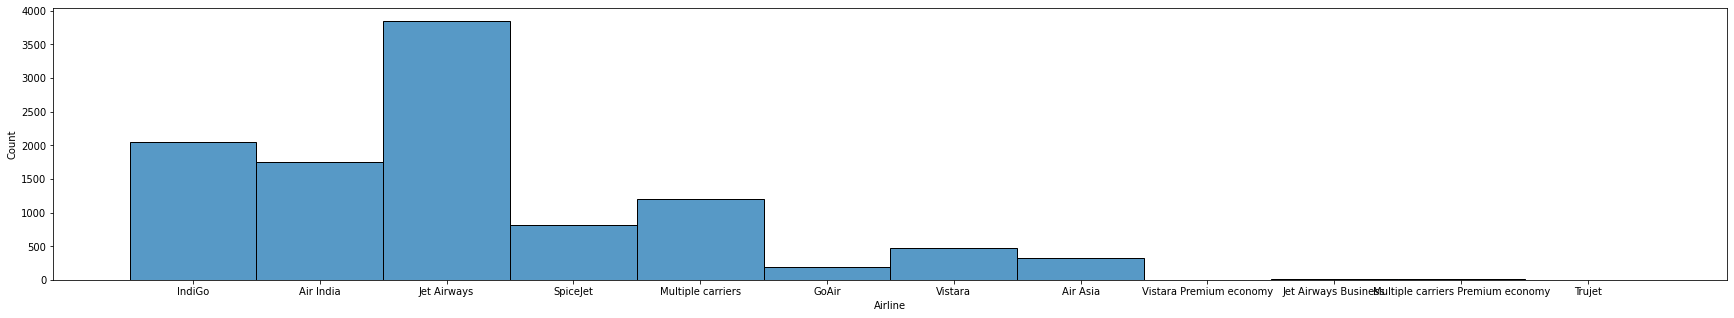

In [52]:
plt.figure(figsize = (30, 5))

sns.histplot(data["Airline"])

<AxesSubplot:xlabel='Source', ylabel='Count'>

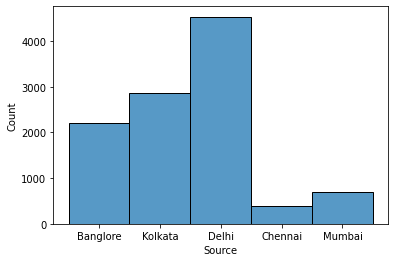

In [53]:
sns.histplot(data["Source"])

<AxesSubplot:xlabel='Destination', ylabel='Count'>

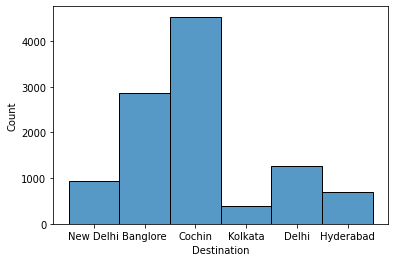

In [54]:
sns.histplot(data["Destination"])

<AxesSubplot:xlabel='Duration', ylabel='Count'>

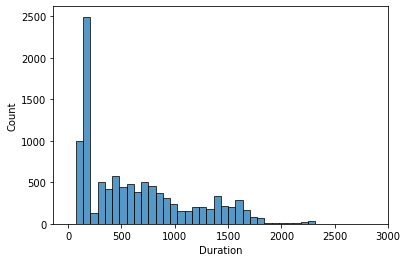

In [55]:
sns.histplot(data["Duration"])

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

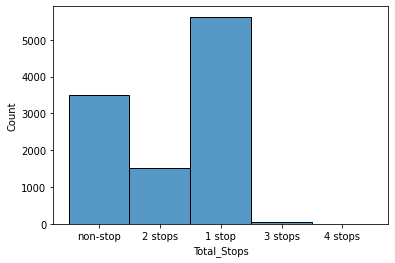

In [56]:
sns.histplot(data["Total_Stops"])

<AxesSubplot:xlabel='Price', ylabel='Count'>

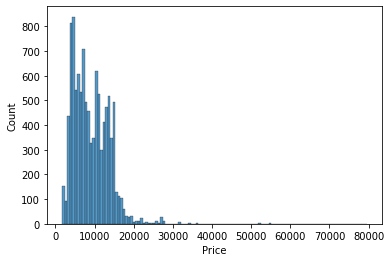

In [57]:
sns.histplot(data["Price"])

<AxesSubplot:xlabel='Month', ylabel='Density'>

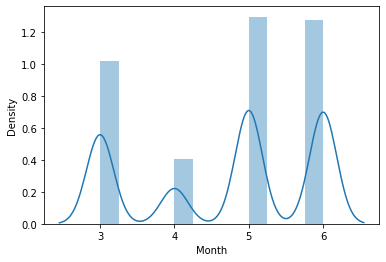

In [58]:
sns.distplot(data["Month"])

# # BIVARIATE ANALYSIS

In [59]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price', 'Month', 'Day', 'ARR_Hour', 'ARR_min', 'Dep_Hour', 'Dep_min'],
      dtype='object')

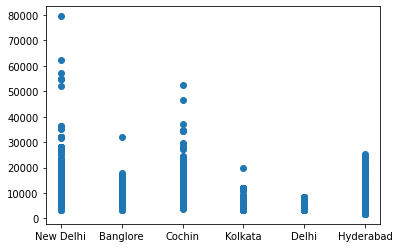

In [60]:
plt.scatter(data ["Destination"], data["Price"])


from the above   graph we can see that the price of  flights  to delhi is top with 80000
and cochin with maximum of 52000

<AxesSubplot:xlabel='Price', ylabel='Duration'>

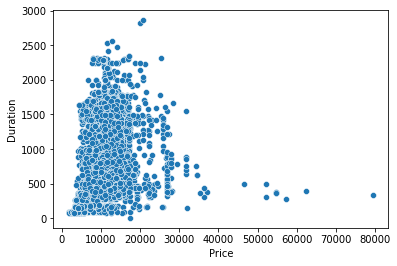

In [61]:
sns.scatterplot(data ["Price"], data["Duration"])


<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

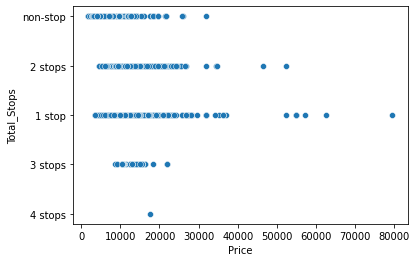

In [62]:
sns.scatterplot(data ["Price"], data["Total_Stops"])


<AxesSubplot:xlabel='ARR_Hour', ylabel='Price'>

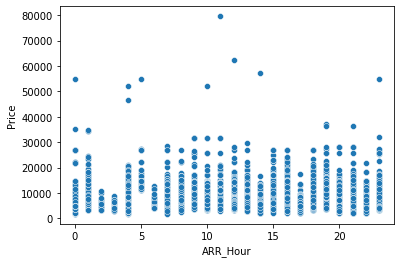

In [63]:
sns.scatterplot(data ["ARR_Hour"], data["Price"])


<AxesSubplot:xlabel='Duration', ylabel='Airline'>

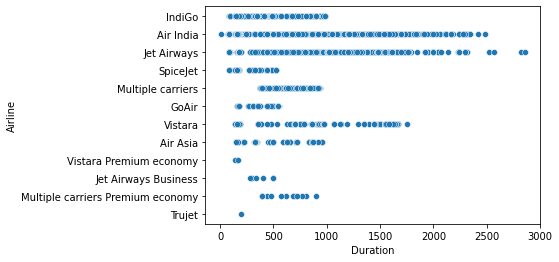

In [64]:
sns.scatterplot(data ["Duration"], data["Airline"])


# Checkin correlation

In [65]:
 data.corr()

,Duration,Price,Month,Day,ARR_Hour,ARR_min,Dep_Hour,Dep_min
Duration,1.000000,0.506480,0.014836,-0.022439,0.051531,-0.069663,0.002088,-0.019099
Price,0.506480,1.000000,-0.103643,-0.153774,0.024244,-0.086155,0.006799,-0.024458
Month,0.014836,-0.103643,1.000000,-0.038359,-0.003927,-0.100626,0.039127,-0.059267
Day,-0.022439,-0.153774,-0.038359,1.000000,-0.003245,-0.017510,0.002170,-0.008170
ARR_Hour,0.051531,0.024244,-0.003927,-0.003245,1.000000,-0.154363,0.005180,0.043122
ARR_min,-0.069663,-0.086155,-0.100626,-0.017510,-0.154363,1.000000,0.067911,-0.017597
Dep_Hour,0.002088,0.006799,0.039127,0.002170,0.005180,0.067911,1.000000,-0.024745
Dep_min,-0.019099,-0.024458,-0.059267,-0.008170,0.043122,-0.017597,-0.024745,1.000000


<AxesSubplot:>

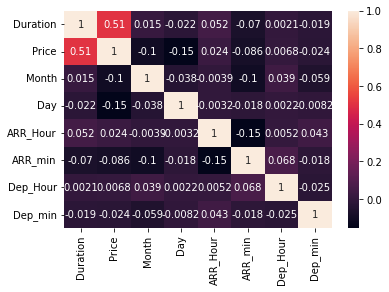

In [66]:
 sns.heatmap( data.corr() , annot = True)

features are not correlated to each other

# # FEATURE  ENGINEERING

### encoding categorical data

In [67]:
from sklearn .preprocessing import OrdinalEncoder

In [68]:
enc =  OrdinalEncoder()

In [69]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [70]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Day,ARR_Hour,ARR_min,Dep_Hour,Dep_min
0,3.0,0.0,5.0,18.0,170,4.0,3897,3,24,1,10,22,20
1,1.0,3.0,0.0,84.0,445,1.0,7662,5,1,13,15,5,50
2,4.0,2.0,1.0,118.0,1140,1.0,13882,6,9,4,25,9,25
3,3.0,3.0,0.0,91.0,325,0.0,6218,5,12,23,30,18,5
4,3.0,0.0,5.0,29.0,285,0.0,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,150,4.0,4107,4,9,22,25,19,55
10679,1.0,3.0,0.0,64.0,155,4.0,4145,4,27,23,20,20,45
10680,4.0,0.0,2.0,18.0,180,4.0,7229,4,27,11,20,8,20
10681,10.0,0.0,5.0,18.0,160,4.0,12648,3,1,14,10,11,30


###   checkin  outliers

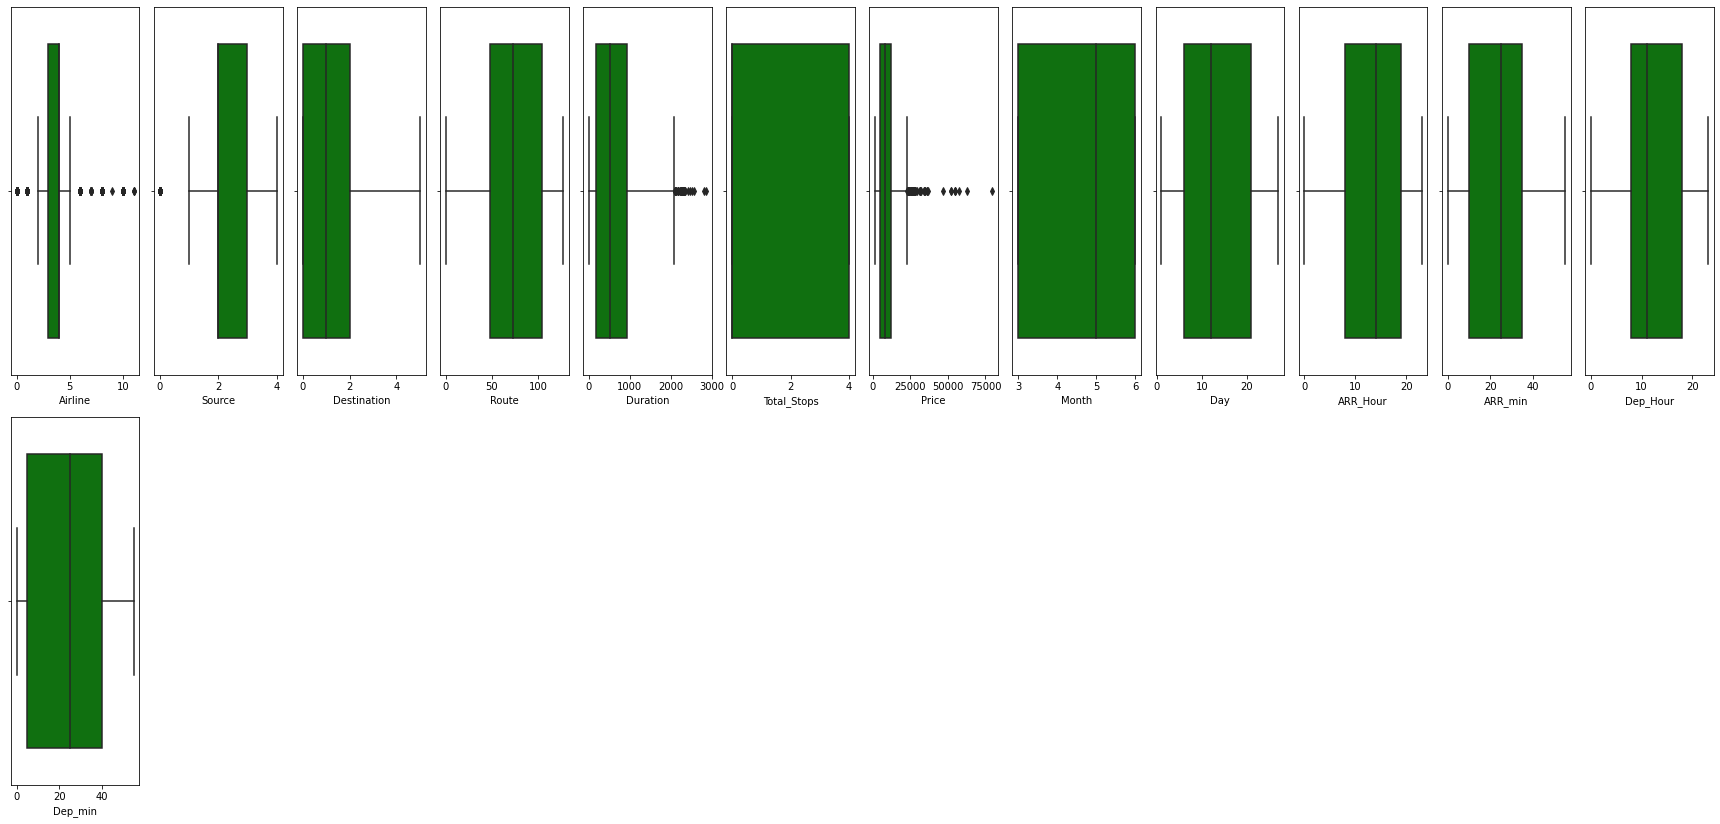

In [71]:
column = data.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

In [72]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data))
data.shape

(10682, 13)

In [73]:
threshold = 3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   936,   946,   959,   966,   969,   975,  1067,
        1113,  1196,  1246,  1341,  1346,  1424,  1442,  1466,  1478,
        1496,  1551,  1629,  1654,  1657,  1785,  1791,  1804,  1918,
        2055,  2099,  2108,  2172,  2495,  2553,  2556,  2618,  2635,
        2641,  2654,  2693,  2718,  2924,  3032,  3111,  3257,  3400,
        3457,  3535,  3700,  3790,  3815,  3966,  4012,  4047,  4118,
        4463,  4521,  4655,  4676,  4829,  5013,  5136,  5372,  5439,
        5516,  5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,
        5782,  5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,
        6407,  6476,  6576,  6588,  6605,  6884,  6991,  7189,  7232,
        7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,
        7612,  7617,  7713,  7724,  7756,  7876,  7902,  7906,  8020,
        8080,  8127,  8153,  8360,  8409,  8412,  8451,  8470,  8536,
        8598,  8601

In [74]:
len(np.where(z>3)[0])

162

In [75]:
data_new = data[(z<3).all(axis=1)]

In [76]:
data_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Day,ARR_Hour,ARR_min,Dep_Hour,Dep_min
0,3.0,0.0,5.0,18.0,170,4.0,3897,3,24,1,10,22,20
1,1.0,3.0,0.0,84.0,445,1.0,7662,5,1,13,15,5,50
2,4.0,2.0,1.0,118.0,1140,1.0,13882,6,9,4,25,9,25
3,3.0,3.0,0.0,91.0,325,0.0,6218,5,12,23,30,18,5
4,3.0,0.0,5.0,29.0,285,0.0,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,150,4.0,4107,4,9,22,25,19,55
10679,1.0,3.0,0.0,64.0,155,4.0,4145,4,27,23,20,20,45
10680,4.0,0.0,2.0,18.0,180,4.0,7229,4,27,11,20,8,20
10681,10.0,0.0,5.0,18.0,160,4.0,12648,3,1,14,10,11,30


### outliers are now cleared 

## checking skewness

In [77]:
data_new.skew()

Airline        0.729344
Source        -0.436831
Destination    1.261683
Route         -0.504375
Duration       0.777397
Total_Stops    0.615227
Price          0.413956
Month         -0.415886
Day            0.108835
ARR_Hour      -0.362282
ARR_min        0.107285
Dep_Hour       0.103062
Dep_min        0.171333
dtype: float64

### as we can see  not much skewness is  there in numerical columns  

In [78]:
data_new.std()

Airline           2.358077
Source            1.172873
Destination       1.452982
Route            36.396784
Duration        492.800356
Total_Stops       1.814888
Price          4061.374559
Month             1.155610
Day               8.442101
ARR_Hour          6.859493
ARR_min          16.539616
Dep_Hour          5.736411
Dep_min          18.727962
dtype: float64

In [79]:
data_new.var()

Airline        5.560529e+00
Source         1.375631e+00
Destination    2.111156e+00
Route          1.324726e+03
Duration       2.428522e+05
Total_Stops    3.293818e+00
Price          1.649476e+07
Month          1.335433e+00
Day            7.126906e+01
ARR_Hour       4.705264e+01
ARR_min        2.735589e+02
Dep_Hour       3.290641e+01
Dep_min        3.507365e+02
dtype: float64

In [80]:
1.324726e+03

1324.726

# seperating x and y 

In [81]:
x = data_new.drop(["Price"] , axis = 1)

In [82]:
y = data_new["Price"]

In [83]:
x



,Airline,Source,Destination,Route,Duration,Total_Stops,Month,Day,ARR_Hour,ARR_min,Dep_Hour,Dep_min
0,3.0,0.0,5.0,18.0,170,4.0,3,24,1,10,22,20
1,1.0,3.0,0.0,84.0,445,1.0,5,1,13,15,5,50
2,4.0,2.0,1.0,118.0,1140,1.0,6,9,4,25,9,25
3,3.0,3.0,0.0,91.0,325,0.0,5,12,23,30,18,5
4,3.0,0.0,5.0,29.0,285,0.0,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,150,4.0,4,9,22,25,19,55
10679,1.0,3.0,0.0,64.0,155,4.0,4,27,23,20,20,45
10680,4.0,0.0,2.0,18.0,180,4.0,4,27,11,20,8,20
10681,10.0,0.0,5.0,18.0,160,4.0,3,1,14,10,11,30


In [84]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10521, dtype: int64

### scaling data

In [85]:
from sklearn import preprocessing

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
gu = StandardScaler()

In [88]:
x =  gu.fit_transform(x)

In [89]:
x

array([[-0.41558917, -1.67490487,  2.46930291, ..., -0.88776168,
         1.65057413, -0.23187116],
       [-1.26377804,  0.88303883, -0.97205987, ..., -0.58544284,
        -1.31309227,  1.37008779],
       [ 0.00850527,  0.03039093, -0.28378732, ...,  0.01919485,
        -0.615759  ,  0.035122  ],
       ...,
       [ 0.00850527, -1.67490487,  0.40448524, ..., -0.283124  ,
        -0.79009231, -0.23187116],
       [ 2.55307188, -1.67490487,  2.46930291, ..., -0.88776168,
        -0.26709236,  0.30211516],
       [-1.26377804,  0.03039093, -0.28378732, ..., -0.58544284,
        -0.44142568,  1.63708095]])

# test train split

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics  import    mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

# checking with linear regression 

In [91]:
ln = LinearRegression()
ln

LinearRegression()

In [92]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .30)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  47.41794542573711
 testing  score is  0 is 46.41486081155234 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  47.12505027529341
 testing  score is  1 is 47.090821773603395 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  47.58232442771339
 testing  score is  2 is 46.06098919168985 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  47.10498523725952
 testing  score is  3 is 47.174271001296496 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  47.57584028041985
 testing  score is  4 is 46.10652328447454 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  46.789937116115134
 testing  score is  5 is 47.79760764456697 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  47.47017692881956
 testing  sco

training score at 63 is  47.307877451849144
 testing  score is  63 is 46.76629894400932 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  47.04395266132193
 testing  score is  64 is 47.36882355409953 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  47.20886629338976
 testing  score is  65 is 46.92754989424459 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  47.358867002929394
 testing  score is  66 is 46.50798550516513 

at random state 67 model preforms best
at random_state =   67
training score at 67 is  46.86872450705217
 testing  score is  67 is 47.76044725795029 

at random state 68 model preforms best
at random_state =   68
training score at 68 is  47.23128769402432
 testing  score is  68 is 46.888285374292906 

at random state 69 model preforms best
at random_state =   69
training score at 69 is  47.19635491303356
 testing  score is  69 is 47.01020474568364 

at

In [93]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = 5  , test_size = 0.3)
ln.fit(x_train,y_train)
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)
print("training score at" ,r2_score(y_train, pred_train)*100)
print(" testing  score is " , r2_score(y_test, pred_test)*100,"\n") 
 

training score at 46.789937116115134
 testing  score is  47.79760764456697 



the  accuracy is  47 for linear regression               


# Checkng with  random forest regressor 

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
random =  RandomForestRegressor(n_estimators= 200)

In [96]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .30)
    random.fit(x_train,y_train)
    pred_train = random.predict(x_train)
    pred_test = random.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  95.2509236544859
 testing  score is  0 is 82.77928088691226 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  95.18149349492221
 testing  score is  1 is 81.76928973722916 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  95.15727181934382
 testing  score is  2 is 81.79005035428169 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  95.15975069569063
 testing  score is  3 is 81.99579947686878 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  95.40299664868319
 testing  score is  4 is 80.55829200010567 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  95.09699529181927
 testing  score is  5 is 82.4538795944128 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  95.3924600739942
 testing  score is 

at random state 55 model preforms best
at random_state =   55
training score at 55 is  95.17493272279096
 testing  score is  55 is 82.48080578561363 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  95.31677182357323
 testing  score is  56 is 81.83778701129336 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  95.48908948300301
 testing  score is  57 is 81.53628338861478 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  95.15739837385972
 testing  score is  58 is 82.59094861686177 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  95.41875485641151
 testing  score is  59 is 82.05321911965329 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  95.14482032949404
 testing  score is  60 is 82.05923715969892 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  95.3705

In [97]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = 62  , test_size = 0.3)
random.fit(x_train,y_train)
pred_train = random.predict(x_train)
pred_test = random.predict(x_test)
print("training score at" ,r2_score(y_train, pred_train)*100)
print(" testing  score is " , r2_score(y_test, pred_test)*100,"\n") 
random_r2 =  r2_score(y_test, pred_test)

training score at 94.97516276798133
 testing  score is  83.62648181519286 



In [98]:


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    ls_score = (cross_val_score(random,x,y,cv =  j ))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("r 2 score = ", random_r2 *100)
    print("\n")

at cv : 2
cross validation score is : 81.87729042470843
r 2 score =  83.62648181519286


at cv : 3
cross validation score is : 82.10509738947775
r 2 score =  83.62648181519286


at cv : 4
cross validation score is : 81.63220706647823
r 2 score =  83.62648181519286


at cv : 5
cross validation score is : 81.52619529486176
r 2 score =  83.62648181519286


at cv : 6
cross validation score is : 81.33063613791825
r 2 score =  83.62648181519286


at cv : 7
cross validation score is : 81.51300984573065
r 2 score =  83.62648181519286


at cv : 8
cross validation score is : 81.33007741093739
r 2 score =  83.62648181519286


at cv : 9
cross validation score is : 81.25241360705272
r 2 score =  83.62648181519286




In [100]:
ls_score = (cross_val_score(random,x,y,cv =  3 )) 
lsc =  ls_score.mean()

print("cross validation score is :" , lsc*100)
print("r 2 score = ", random_r2 *100)
    


cross validation score is : 82.04530460954277
r 2 score =  83.62648181519286


 
###  for random forest cross validation score is : 82.04530460954277
### r 2 score =  83.62648181519286

#  checking with K neighbors

In [102]:
from sklearn.neighbors import KNeighborsRegressor


In [103]:
kn= KNeighborsRegressor ()

In [104]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .30)
    kn.fit(x_train,y_train)
    pred_train = kn.predict(x_train)
    pred_test = kn.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  84.05001806141713
 testing  score is  0 is 73.43649519785099 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  83.77395379548027
 testing  score is  1 is 74.70266612323323 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  83.95088019492518
 testing  score is  2 is 72.89702703486752 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  83.58736998194489
 testing  score is  3 is 75.1707379000778 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  84.26677724441822
 testing  score is  4 is 73.47619593022134 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  83.46680868895804
 testing  score is  5 is 75.30850093568218 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  83.82370622837307
 testing  score i

at random state 55 model preforms best
at random_state =   55
training score at 55 is  83.72121191938716
 testing  score is  55 is 75.77550812431474 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  83.31930824358909
 testing  score is  56 is 75.11432697458257 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  83.70592245204914
 testing  score is  57 is 75.32114976324851 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  83.52890079414996
 testing  score is  58 is 74.96973674705364 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  83.9716926422278
 testing  score is  59 is 74.87671446634909 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  83.44663255147408
 testing  score is  60 is 74.5714483707166 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  83.553803

In [111]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = 62  , test_size = 0.3)
kn.fit(x_train,y_train)
pred_train = kn.predict(x_train)
pred_test = kn.predict(x_test)
print("training score at" ,r2_score(y_train, pred_train)*100)
print(" testing  score is " , r2_score(y_test, pred_test)*100 ) 
KN =  r2_score(y_test, pred_test)

training score at 83.49169244143665
 testing  score is  75.7701367016674


In [113]:


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    ls_score = (cross_val_score(kn,x,y,cv =  j ))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("r 2 score = " , KN * 100 ,"\n" )
    print("\n")

at cv : 2
cross validation score is : 72.53514581581295
r 2 score =  75.7701367016674 



at cv : 3
cross validation score is : 74.4348353605414
r 2 score =  75.7701367016674 



at cv : 4
cross validation score is : 74.99343688168435
r 2 score =  75.7701367016674 



at cv : 5
cross validation score is : 75.53879514614734
r 2 score =  75.7701367016674 



at cv : 6
cross validation score is : 75.65803070042209
r 2 score =  75.7701367016674 



at cv : 7
cross validation score is : 75.899461584821
r 2 score =  75.7701367016674 



at cv : 8
cross validation score is : 76.06573683680952
r 2 score =  75.7701367016674 



at cv : 9
cross validation score is : 76.00824470602389
r 2 score =  75.7701367016674 





In [118]:
ls_score = (cross_val_score( kn , x , y , cv =  9 )) 
lsc =  ls_score.mean()

print ( "cross validation score is : " , lsc * 100 )
print ( " r 2 score = " , KN  *100 )
    


cross validation score is :  76.00824470602389
 r 2 score =  75.7701367016674


### for k neighbor 
#### cross validation score is :  76.00824470602389
 ### r 2 score =  75.7701367016674


## from the above models we can say that the random forest is the best  performing model 
## with  cross validation score is : 82.04530460954277
## r 2 score =  83.62648181519286

 #  hyper parameter tuning

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kn = KFold(n_splits=5)

In [126]:
random =  RandomForestRegressor() 
gird_parameter = {  'criterion' : ["squared_error", "absolute_error"] , "max_features" : ["log2" , "sqrt"] ,'min_samples_leaf': [2, 10, 30] } 
cv = KFold(n_splits = 5, shuffle = False)


In [127]:
clf = GridSearchCV(random,gird_parameter  , n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 2}


In [132]:
random =  RandomForestRegressor( criterion = "squared_error" , max_features = "sqrt" , min_samples_leaf = 2) 
random.fit(x_train,y_train)
pred_train = random.predict(x_train)
pred_test = random.predict(x_test)
print("training score at" ,r2_score(y_train, pred_train))
print(" testing  score is " , r2_score(y_test, pred_test)) 


training score at 0.9116677021729143
 testing  score is  0.8401517229911609


# testing  score  with hyper parameter is  testing  score is  0.8401517229911609

Text(0.5, 1.0, 'linear regression')

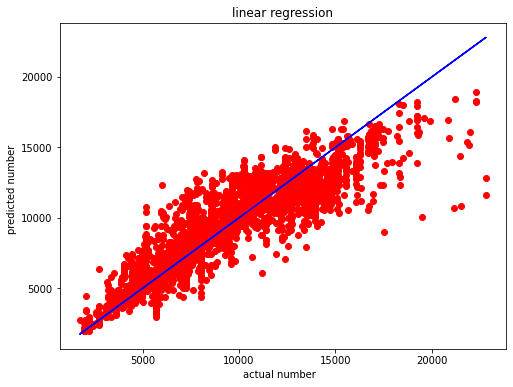

In [133]:
plt.figure(figsize = (8,6))
plt.scatter( x =  y_test , y  = pred_test , color = "r")
plt.plot(y_test, y_test , color = "b")
plt.xlabel("actual number  ")
plt.ylabel("predicted number  ")
plt.title("linear regression")



# saving

In [134]:
import pickle


In [135]:
filename = "flight price prediction.pkl"


In [136]:
pickle.dump(random, open(filename,"wb"))